# Práctico 2 - Procesamiento Digital de Imágenes

In [31]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#Definiendo Matriz de RGB a YIQ
MatrizRGBtoYIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])
#Definiendo Matriz de YIQ a RGB  
MatrizYIQtoRGB=np.array([[1,0.9663,0.6210],
                         [1,-0.2721,-0.6474],
                         [1,-1.1070,1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MatrizRGBtoYIQ)

def yiq2rgb(img):
    return apply_matrix(img, MatrizYIQtoRGB)

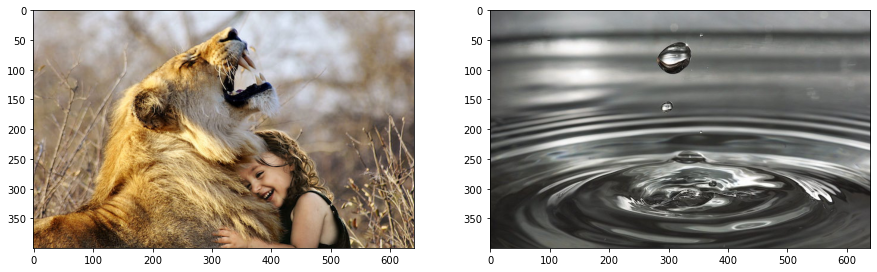

In [33]:
Imagen_RGB1 = imageio.imread('../PDITARRAGA/Lion640.jpeg')[0:400,:,:]/255
Imagen_RGB2 = imageio.imread('../PDITARRAGA/drip640.jpeg')[0:400,:,:]/255
fig, axes = plt.subplots(1, 2, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)

## 1. Aritmética de pixels

Implementar las siguientes operaciones aritméticas:

1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
2. Suma y diferencia promediada en RGB
3. Suma y diferencia en YIQ
4. If-lighter / If-darker

## 1. Suma y diferencia clampeada en RGB 

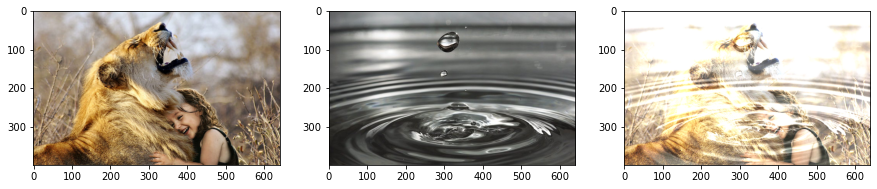

In [34]:
# Implementación de suma clampleada
Imagen_sumac = np.clip(Imagen_RGB1+Imagen_RGB2, 0, 1)
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
axes[2].imshow(Imagen_sumac)

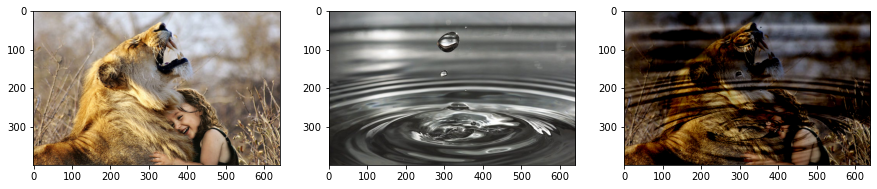

In [35]:
# Implementación de resta clampleada
Imagen_restac = np.clip(Imagen_RGB1-Imagen_RGB2, 0, 1)
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
axes[2].imshow(Imagen_restac)

## 2. Suma y diferencia promediada en RGB

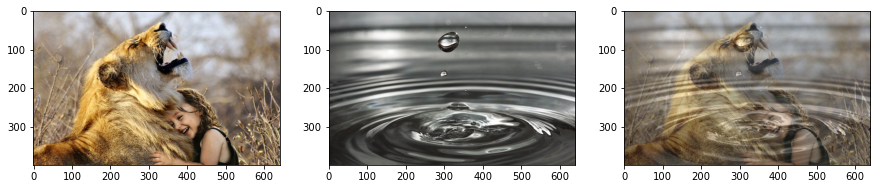

In [36]:
# Implementación de suma promediada en RGB
Imagen_sumap = np.clip(0.5*Imagen_RGB1+0.5*Imagen_RGB2, 0, 1)
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
axes[2].imshow(Imagen_sumap)

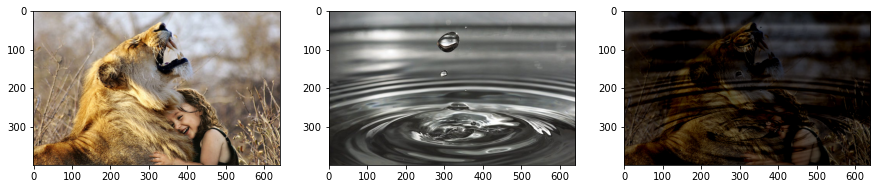

In [37]:
# Implementación de resta promediada en RGB
Imagen_restap = np.clip(0.5*Imagen_RGB1-0.5*Imagen_RGB2, 0, 1)
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
axes[2].imshow(Imagen_restap)

##  3. Cuasisuma en YIQ

In [38]:
#Convertir al espacio YIQ
YIQA=rgb2yiq(Imagen_RGB1)
YIQB=rgb2yiq(Imagen_RGB2)
Filas,Columnas,Canales=YIQA.shape # obtenemos el tamaño de la imagen original de YIQA

## Suma Promediada en Y I Q

In [39]:
YIQC = np.zeros((Filas,Columnas,3)) # Genera matriz vacia
YIQC[:,:,0]=0.5*YIQA[:,:,0]+0.5*YIQB[:,:,0]

In [40]:
YA=YIQA[:,:,0]
YB=YIQB[:,:,0]
IA=YIQA[:,:,1]
IB=YIQB[:,:,1]
QA=YIQA[:,:,2]
QB=YIQB[:,:,2]

In [41]:
# Calcular valores de Y
for i in range(Filas):
    for j in range(Columnas) :
              YIQC[i,j,1] =(YA[i,j]*IA[i,j]+YB[i,j]*IB[i,j])/(YA[i,j]+YB[i,j]) ; # Calcular : IC=(YA*IA+YB*IB)/(YA+YB)

In [42]:
# Calcular valores de Q
for i in range(Filas):
    for j in range(Columnas) :
              YIQC[i,j,2] =(YA[i,j]*QA[i,j]+YB[i,j]*QB[i,j])/(YA[i,j]+YB[i,j]) ; # Calcular : QC=(YA*QA+YB*QB)/(YA+YB)

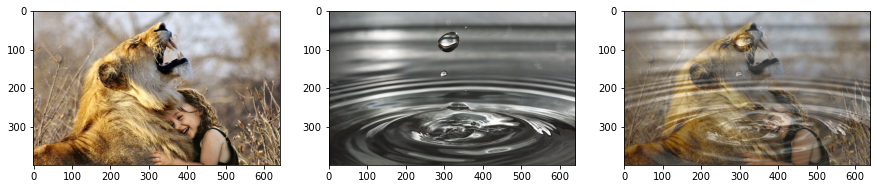

In [43]:
ImagenRGB3Prom = yiq2rgb(YIQC) #Convierte de YIQC promediado a RGB
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
ImagenRGB3Prom=np.clip(ImagenRGB3Prom, 0, 1) # Clampea imagen en 0 a 1 en RGB
axes[2].imshow(ImagenRGB3Prom)

## 4. If-lighter

In [44]:
YIQIL = np.zeros((Filas,Columnas,3)) # Genera matriz vacia

In [45]:
# Condiciones
for i in range(Filas):
    for j in range(Columnas) :
              if YA[i,j] > YB[i,j]:
                 YIQIL[i,j,:] = YIQA[i,j,:]     
              else: 
                YIQIL[i,j,:] = YIQB[i,j,:]
               
                               

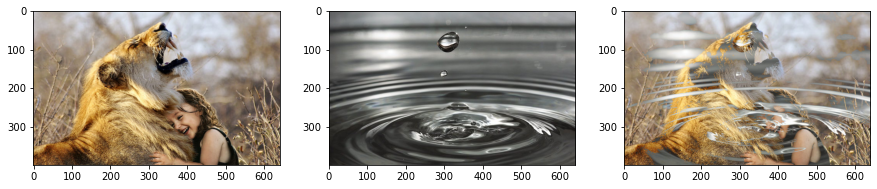

In [46]:
ImagenRGB3IL = yiq2rgb(YIQIL) #Convierte de YIQC promediado a RGB
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
ImagenRGB3IL=np.clip(ImagenRGB3IL, 0, 1) # Clampea imagen en 0 a 1 en RGB
axes[2].imshow(ImagenRGB3IL)

## 4. If-darker

In [47]:
YIQID = np.zeros((Filas,Columnas,3)) # Genera matriz vacia

In [48]:
# Condiciones
for i in range(Filas):
    for j in range(Columnas) :
              if YA[i,j] <= YB[i,j]:
                YIQID[i,j,:] =YIQA[i,j,:]
              else: 
                YIQID[i,j,:] =YIQB[i,j,:]

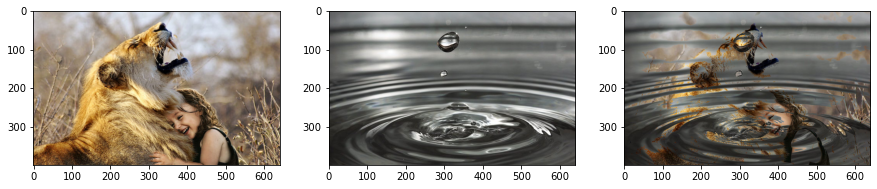

In [49]:
ImagenRGB3ID = yiq2rgb(YIQID) #Convierte de YIQC promediado a RGB
fig, axes = plt.subplots(1, 3, figsize=(15,10))
axes[0].imshow(Imagen_RGB1)
axes[1].imshow(Imagen_RGB2)
ImagenRGB3ID=np.clip(ImagenRGB3ID, 0, 1) # Clampea imagen en 0 a 1 en RGB
axes[2].imshow(ImagenRGB3ID)